<a href="https://colab.research.google.com/github/samantha-isaac/Emotion-Detection-in-Images-and-Music-Pairing-Through-AI/blob/main/Testing_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing of Models

Samantha Isaac

## Baseline CNN Face Expressions

In [ ]:
import cv2
import os
import random
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
# This is to mount Drive to this project
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Connect to My Drive
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
!ls ./output/ # Just to check if the models are in the correct location

emotion_model_baseline_v1.keras  emotion_model_baseline_v3.keras  landscape_model_best.keras
emotion_model_baseline_v2.keras  emotion_model_baseline_v4.keras  landscape_model_best_V1.keras


In [ ]:
# Choose the model to load
model = load_model('./output/landscape_model_best_V1.keras')

In [ ]:
# In here I stablish manually the index of each label accordding to the output of the model
label_map_faces = {
    0 : 'Fear',
    1 : 'Angry',
    2 : 'Sad',
    3 : 'Happy',
    4 : 'Neutral'
}
label_map_landscapes = {
    0 : 'melancholy',
    1 : 'joy',
    2 : 'liveliness',
    3 : 'sadness'
}

In [ ]:
# This is a dictionary with the corresponding playlist according to the emotion
emotion_to_playlist = {
    'Happy': 'https://open.spotify.com/playlist/happy_playlist_url',
    'Sad': 'https://open.spotify.com/playlist/sad_playlist_url',
    'Angry': 'https://open.spotify.com/playlist/angry_playlist_url',
    'Neutral': 'https://open.spotify.com/playlist/neutral_playlist_url',
    'Fear': 'https://open.spotify.com/playlist/fear_playlist_url',
    'joy' : 'https://open.spotify.com/playlist/joy_playlist_url',
    'liveliness' : 'https://open.spotify.com/playlist/liveliness_playlist_url',
    'melancholy' : 'https://open.spotify.com/playlist/melancholy_playlist_url',
    'sadness' : 'https://open.spotify.com/playlist/sadness_playlist_url'
}

# Facial Expressions

In [ ]:
# These function are similar to the ones for the corresponding dataset, it's to load the dataset and the correspoding label as well as the preprocesing
def predict_face_emotion(image_path, model):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Reference for this: https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html
    if image is None:
        print(f"Error loading image: {image_path}") # To know if there was an error when loading the image
        return None
    image = cv2.resize(image, (48, 48)) # To resize the images to the corresponding size the model expects
    image = image / 255.0  # To normalize and to convert in arrays of NumPy the image. Reference from: https://numpy.org/doc/stable/reference/generated/numpy.array.html
    image = np.expand_dims(image, axis = 0) # This is to expland the dimensions of the image
    # Reference: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    image = np.expand_dims(image, axis = -1) # This is to expland the dimensions of the image

    # This makes the predictions with the previously loaded model and with the selected image
    predictions = model.predict(image)
    # To establish the label that has more probability. Reference: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
    predicted_emotion = np.argmax(predictions)

    emotion_label = label_map_faces[predicted_emotion]
    return emotion_label

# This function is to retunr the corresponding playlist based on the predicted emotion
def get_playlist(emotion):
    return emotion_to_playlist.get(emotion, "https://open.spotify.com/playlist/default_playlist_url")

In [ ]:
# This function is to select only one random image from the specific dataset of testing and to call and run the model
def run_random_image_test():
    # The testing dataset location
    testing_folder = '/content/drive/MyDrive/Dissertation/Code/Data_Faces/Testing'

    # Get a list of all subfolders in the testing folder
    sub_folders = [os.path.join(testing_folder, d) for d in os.listdir(testing_folder) if os.path.isdir(os.path.join(testing_folder, d))]

    # This selects a random subfolder from the previous list
    random_sub_folder = random.choice(sub_folders) # Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

    # Extracts the corresponding name of the folder which indicates the label of the image
    true_label = os.path.basename(random_sub_folder) # Reference: https://docs.python.org/3/library/os.path.html

    # Gets a list of all the images in the correspodning subfolder
    image_files = [f for f in os.listdir(random_sub_folder) if os.path.isfile(os.path.join(random_sub_folder, f))]

    # Selects a random image from the bunch
    random_image = random.choice(image_files) # Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

    # Get the full path of the selected image
    image_path = os.path.join(random_sub_folder, random_image)

    # Prints the correct label to verify the prediction
    print(f"Correct label: {true_label}")

    # This is to call the model with the selected image
    emotion = predict_face_emotion(image_path, model)

    if emotion:
        playlist_url = get_playlist(emotion)
        print(f"The predicted emotion is: {emotion}")
        print(f"We recommend this playlist: {playlist_url}")

        # To show the image with correct and predicted label
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f"Correct: {true_label}, Predicted: {emotion}")
        plt.show()

        # Compares the correct label with the prediction
        if emotion == true_label:
            print("The prediction is correct")
        else:
            print("The prediction is incorrect")
    else:
      print("The emotion could not be predicted or there was an error")

Correct label: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted emotion is: Happy
We recommend this playlist: https://open.spotify.com/playlist/happy_playlist_url


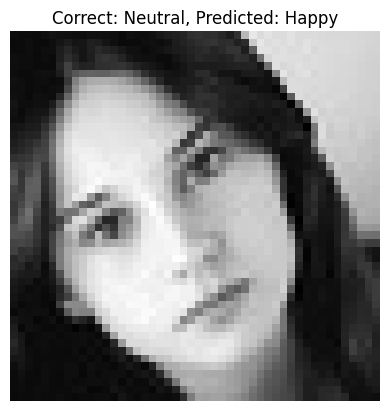

The prediction is incorrect


In [ ]:
# This is to run the whole system
run_random_image_test()

# Landscape Emotions

In [ ]:
# Function to load the corresponding dataset, and to do the preprocessing to the image
def predict_landscape_emotion(image_path, model):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR) # It reads the images in BGR
    if image is None:
        print(f"Error loading image: {image_path}") # To know if there was an error when loading the image
        return None

    image = cv2.resize(image, (96, 96)) # To resize the images to the corresponding size the model expects
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # This is to convert from BGR to RGB
    image = image / 255.0 # To normalize and to convert in arrays of NumPy the image. Reference from: https://numpy.org/doc/stable/reference/generated/numpy.array.html
    image = np.expand_dims(image, axis = 0) # This is to expland the dimensions of the image
    # Reference: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

    # This makes the predictions with the previously loaded model and with the selected image
    predictions = model.predict(image)
    predicted_emotion = np.argmax(predictions)

    # Obtener la etiqueta correspondiente a la predicción
    emotion_label = label_map_landscapes[predicted_emotion]
    return emotion_label

# This function is to retunr the corresponding playlist based on the predicted emotion
def get_playlist(emotion):
    return emotion_to_playlist.get(emotion, "https://open.spotify.com/playlist/default_playlist_url")

# This function is to select only one random image from the specific dataset of testing and to call and run the model
def run_random_landscape_test():
    # The testing dataset location
    landscape_folder = '/content/drive/MyDrive/Dissertation/Code/Data_Landscapes'

    # Get a list of all subfolders in the testing folder
    sub_folders = [os.path.join(landscape_folder, d) for d in os.listdir(landscape_folder) if os.path.isdir(os.path.join(landscape_folder, d))]

    # This selects a random subfolder from the previous list
    random_sub_folder = random.choice(sub_folders) # Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

     # Extracts the corresponding name of the folder which indicates the label of the image
    true_label = os.path.basename(random_sub_folder) # Reference: https://docs.python.org/3/library/os.path.html

    # Gets a list of all the images in the correspodning subfolder
    image_files = [f for f in os.listdir(random_sub_folder) if os.path.isfile(os.path.join(random_sub_folder, f))]
    # Selects a random image from the bunch
    random_image = random.choice(image_files) # Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
    # Get the full path of the selected image
    image_path = os.path.join(random_sub_folder, random_image)

    # Prints the correct label to verify the prediction
    print(f"Correct label: {true_label}")
    # This is to call the model with the selected image
    emotion = predict_landscape_emotion(image_path, model)

    if emotion:
        playlist_url = get_playlist(emotion)
        print(f"The predicted emotion is: {emotion}")
        print(f"We recommend this playlist: {playlist_url}")
        # To show the image with correct and predicted label
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Correct: {true_label}, Predicted: {emotion}")
        plt.show()

        # Compares the correct label with the prediction
        if emotion == true_label:
            print("The prediction is correct")
        else:
            print("The prediction is incorrect")
    else:
        print("The emotion could not be predicted or there was an error")

Correct label: melancholy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted emotion is: sadness
We recommend this playlist: https://open.spotify.com/playlist/sadness_playlist_url


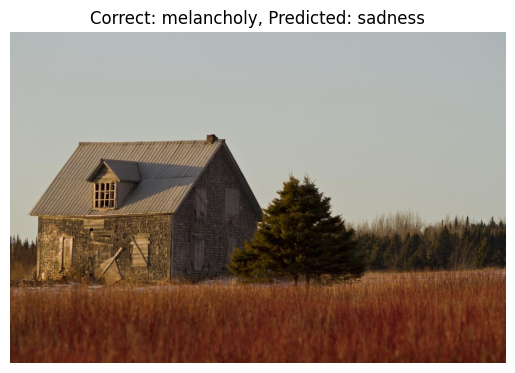

The prediction is incorrect


In [ ]:
# To run the system
run_random_landscape_test()